In [1]:
import pandas as pd
import numpy as np
import os
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
teacan_readout_dir = '/tscc/nfs/home/pjaganna1/projects/apa_screen_yongsheng/teacan_readout'

In [3]:
down_firefly = pd.read_excel(os.path.join(teacan_readout_dir, '2021-04-29 Firefly.xls'), sheet_name='Sheet2',header=34, index_col=0, nrows=1)

In [4]:
down_firefly

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,372,406,1239,3391,618,858,596,1113,226,812,450,1253


In [5]:
down_renilla = pd.read_excel(os.path.join(teacan_readout_dir,'2021-04-29 Renilla.xls'), sheet_name='P2CD+Downstream',header=34, index_col=0, nrows=1, usecols='A:M')

In [6]:
down_renilla

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,798,566,2853,926,1222,948,1218,234,382,532,926,270


In [7]:
down_ratio = down_renilla/down_firefly

In [8]:
down_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,2.145161,1.394089,2.302663,0.273076,1.977346,1.104895,2.043624,0.210243,1.690265,0.655172,2.057778,0.215483


In [9]:
ctl = ['NEG', 'CPSF5', 'CPSF6', 'HNRNPCL1']*3

In [10]:
down_ratio = down_ratio.T

In [11]:
down_ratio['label'] = ctl

In [12]:
down_ratio

<>,A,label
1,2.145161,NEG
2,1.394089,CPSF5
3,2.302663,CPSF6
4,0.273076,HNRNPCL1
5,1.977346,NEG
6,1.104895,CPSF5
7,2.043624,CPSF6
8,0.210243,HNRNPCL1
9,1.690265,NEG
10,0.655172,CPSF5


In [13]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from statistics import mean
from statistics import stdev

vals = {}
down_neg = down_ratio[down_ratio['label']=='NEG']["A"].tolist()
for l in ['CPSF5', 'CPSF6', 'HNRNPCL1']:
    samples = down_ratio[down_ratio['label']==l]["A"].tolist()
    t, p = ttest_ind(down_neg, samples, equal_var=False)
    samples.append(mean(samples))
    samples.append(stdev(samples))
    samples.append(p)
    if p < 0.005:
        samples.append('***')
    elif p < 0.01:
        samples.append('**')
    elif p < 0.05:
        samples.append('*')
    else:
        samples.append('ns')
    #print(l, samples, p)
    vals[l] = samples
down_neg.append(mean(down_neg))
down_neg.append(stdev(down_neg))
down_neg.append('None')
down_neg.append('None')



vals['NEG'] = down_neg
df = pd.DataFrame(vals).T
df.columns = ['rep1', 'rep2', 'rep3', 'mean', 'std', 'pvalue', 'stars']
df

,rep1,rep2,rep3,mean,std,pvalue,stars
CPSF5,1.394089,1.104895,0.655172,1.051385,0.304025,0.033238,*
CPSF6,2.302663,2.043624,2.057778,2.134688,0.118917,0.28958,ns
HNRNPCL1,0.273076,0.210243,0.215483,0.232934,0.028465,0.005176,**
NEG,2.145161,1.977346,1.690265,1.937591,0.187826,None,None


In [14]:
df.T.loc['rep1':'rep3',:][['NEG', 'CPSF5', 'CPSF6', 'HNRNPCL1']]

,NEG,CPSF5,CPSF6,HNRNPCL1
rep1,2.145161,1.394089,2.302663,0.273076
rep2,1.977346,1.104895,2.043624,0.210243
rep3,1.690265,0.655172,2.057778,0.215483


In [15]:
df_log2 = df.T.loc['rep1':'rep3',:][['NEG', 'CPSF5', 'CPSF6', 'HNRNPCL1']].copy()
for c in df_log2.columns:
    df_log2[f'{c}_FC'] = df_log2[c]/df_log2['NEG']
for r in ['NEG','CPSF5', 'CPSF6', 'HNRNPCL1']:
    df_log2[f'{r}'] = [np.log2(i) for i in df_log2[f'{r}_FC'].tolist()]
df_toplot = df_log2[[p for p in df_log2.columns if '_' not in p]].T.merge(df[['pvalue', 'stars']],left_index=True, right_index=True)

In [16]:
df_toplot.reindex(['CPSF5', 'CPSF6', 'HNRNPCL1']).reset_index()

,index,rep1,rep2,rep3,pvalue,stars
0,CPSF5,-0.621764,-0.839656,-1.367303,0.033238,*
1,CPSF6,0.102217,0.047564,0.283837,0.28958,ns
2,HNRNPCL1,-2.973713,-3.233439,-2.971605,0.005176,**


In [17]:
up_firefly = pd.read_excel(os.path.join(teacan_readout_dir,'2021-04-29 Firefly.xls'), sheet_name='Sheet3',header=34, index_col=0, nrows=1)
up_firefly

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,738,209,450,4055,1524,287,223,1644,494,153,338,1600


In [18]:
up_renilla = pd.read_excel(os.path.join(teacan_readout_dir, '2021-04-29 Renilla.xls'), sheet_name='P2EF+Upstream',header=34, index_col=0, nrows=1, usecols='A:M')
up_renilla

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,907,1737,3512,1211,1321,2316,1597,513,461,1173,1365,185


In [19]:
up_ratio = up_renilla/up_firefly
up_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
<>,,,,,,,,,,,,
A,1.228997,8.311005,7.804444,0.298644,0.866798,8.069686,7.161435,0.312044,0.933198,7.666667,4.038462,0.115625


In [20]:
ctl = ['NEG', 'CPSF5', 'CPSF6', 'HNRNPCL1']*3

In [21]:
up_ratio = up_ratio.T

In [22]:
up_ratio['label'] = ctl

In [23]:
up_ratio.head()

<>,A,label
1,1.228997,NEG
2,8.311005,CPSF5
3,7.804444,CPSF6
4,0.298644,HNRNPCL1
5,0.866798,NEG


In [24]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from statistics import mean
from statistics import stdev

up_vals = {}
up_neg = up_ratio[up_ratio['label']=='NEG']["A"].tolist()
for l in ['CPSF5', 'CPSF6', 'HNRNPCL1']:
    samples = up_ratio[up_ratio['label']==l]["A"].tolist()
    t, p = ttest_ind(up_neg, samples, equal_var=False)
    samples.append(mean(samples))
    samples.append(stdev(samples))
    samples.append(p)
    if p < 0.005:
        samples.append('***')
    elif p < 0.01:
        samples.append('**')
    elif p < 0.05:
        samples.append('*')
    else:
        samples.append('ns')
    #print(l, samples, p)
    up_vals[l] = samples
up_neg.append(mean(up_neg))
up_neg.append(stdev(up_neg))
up_neg.append('None')
up_neg.append('None')



up_vals['NEG'] = up_neg
up_df = pd.DataFrame(up_vals).T
up_df.columns = ['rep1', 'rep2', 'rep3', 'mean', 'std', 'pvalue', 'stars']
up_df

,rep1,rep2,rep3,mean,std,pvalue,stars
CPSF5,8.311005,8.069686,7.666667,8.015786,0.265797,0.000035,***
CPSF6,7.804444,7.161435,4.038462,6.33478,1.644825,0.043414,*
HNRNPCL1,0.298644,0.312044,0.115625,0.242104,0.089601,0.007922,**
NEG,1.228997,0.866798,0.933198,1.009665,0.157443,None,None


In [25]:
up_df_log2 = up_df.T.loc['rep1':'rep3',:][['NEG', 'CPSF5', 'CPSF6', 'HNRNPCL1']].copy()
for c in up_df_log2.columns:
    up_df_log2[f'{c}_FC'] = up_df_log2[c]/up_df_log2['NEG']
for r in ['NEG','CPSF5', 'CPSF6', 'HNRNPCL1']:
    up_df_log2[f'{r}'] = [np.log2(i) for i in up_df_log2[f'{r}_FC'].tolist()]
up_df_toplot = up_df_log2[[p for p in up_df_log2.columns if '_' not in p]].T.merge(up_df[['pvalue', 'stars']],left_index=True, right_index=True)
up_df_toplot

,rep1,rep2,rep3,pvalue,stars
NEG,0.000000,0.000000,0.000000,None,None
CPSF5,2.757541,3.218745,3.038344,0.000035,***
CPSF6,2.666814,3.046481,2.113550,0.043414,*
HNRNPCL1,-2.040985,-1.473947,-3.012730,0.007922,**


In [26]:
up_df_toplot['reporter']='Upstream'
df_toplot['reporter']='Downstream'

In [27]:
merge = pd.concat([df_toplot, up_df_toplot]).reset_index()


In [28]:
merge 

,index,rep1,rep2,rep3,pvalue,stars,reporter
0,NEG,0.000000,0.000000,0.000000,None,None,Downstream
1,CPSF5,-0.621764,-0.839656,-1.367303,0.033238,*,Downstream
2,CPSF6,0.102217,0.047564,0.283837,0.28958,ns,Downstream
3,HNRNPCL1,-2.973713,-3.233439,-2.971605,0.005176,**,Downstream
4,NEG,0.000000,0.000000,0.000000,None,None,Upstream
5,CPSF5,2.757541,3.218745,3.038344,0.000035,***,Upstream
6,CPSF6,2.666814,3.046481,2.113550,0.043414,*,Upstream
7,HNRNPCL1,-2.040985,-1.473947,-3.012730,0.007922,**,Upstream


In [31]:
sns.set_style('whitegrid')
same_plot=[]
for index, row in merge.iterrows():
    if row['index'] !='NEG':
        same_plot.append([row['index'], row['rep1'], 'rep1', row['reporter']])
        same_plot.append([row['index'], row['rep2'], 'rep2', row['reporter']])
        same_plot.append([row['index'], row['rep3'], 'rep3', row['reporter']])
    

<Axes: xlabel='0', ylabel='1'>

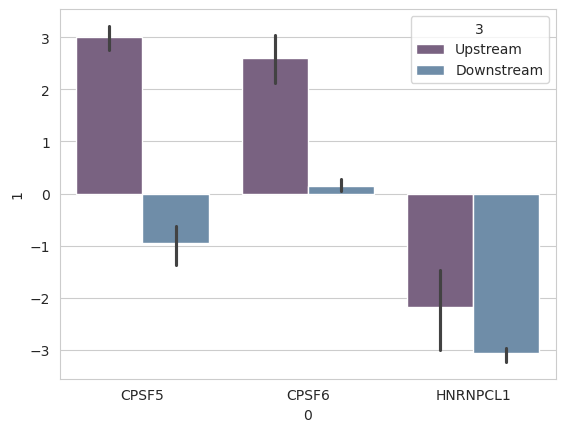

In [32]:
sns.barplot(data=pd.DataFrame(same_plot), x=0, y=1, hue=3, palette=['#7C5D86', '#668EB1'], hue_order=['Upstream', 'Downstream'])
# plt.savefig('upstream_downstream_control_log2.png')
# plt.savefig('upstream_downstream_control_log2.svg')
# plt.savefig('upstream_downstream_control_log2.png')